<a href="https://colab.research.google.com/github/EnockCity/PERSONAL_PROJECT/blob/master/Crop_Yield_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Crop Yield Prediction Model Report**


**Executive Summary**

This project introduces a robust crop yield prediction model leveraging a Random Forest algorithm. Rigorous testing and a high R2 score (95% and above) demonstrate its exceptional accuracy in predicting crop yield based on various conditions. By providing farmers with actionable insights and recommendations, this model empowers them to make informed decisions, optimize their practices, and ultimately enhance agricultural productivity.

**Introduction**

In the face of climate change and resource constraints, accurate crop yield prediction is paramount for agricultural sustainability. My model addresses this challenge by providing farmers with a powerful tool to anticipate their yields and proactively adapt their strategies.

**Importance**

Accurate crop yield predictions can significantly impact agricultural decision-making. By understanding potential yields, farmers can:

Adjust agricultural practices in advance to improve yield.

Optimize the use of resources such as fertilizers and pesticides.

Plan for market supply and demand.

Increase overall agricultural efficiency and profitability

**Data Preparation**

**Dataset and features**

**Dataset**: Crop_yield dataset

Crop_yield dataset that contains various factors that could influence the yield of a particular crop across different regions.

**Descriptions of columns in the dataset:**

**Region:** The geographical area or zone where the crop was grown('East', 'West', 'North', 'South').

**Temperature:** The average temperature (in Celsius) during the growing season.

**Rainfall:** The total amount of rainfall (in millimeters) received during the growing season.

**Soil_Type:** The category or classification of the soil in which the crop was planted (sandy, loamy, clay).

**Fertilizer_Usage:** The quantity of fertilizer applied to the crop in kg per hectare.

**Pesticide_Usage:** The quantity of pesticide used on the crop in litres per hectare.

**Irrigation:** Irrigated(1) or not irrigated(0).

**Crop_Variety:** The specific variety or cultivar of the crop being grown('Variety B', 'Variety A', 'Variety C').

**Yield:** The amount of crop harvested in tonnes per hectare).It is the target variable.

**Data Splitting**

The dataset was split into three sets:

Training Set (70%): Used to train the model.

Validation Set (15%): Used to fine-tune the model and select the best hyperparameters.

Test Set (15%): Used to evaluate the final model's performance.

**Preprocessing**

Data preprocessing steps included:

Handling missing values.

Encoding categorical variables.

Normalizing numerical features.

Detecting and treating outliers.

**Model Selection**

A Random Forest model was chosen for its robustness and ability to handle non-linear relationships between features and the target variable (crop yield).

**Hyperparameter Tuning**

The model was trained with different numbers of estimators (trees) to identify the optimal configuration. Cross-validation was used to ensure the model generalizes well to unseen data

**Model Training**

The Random Forest model was trained on the training set and validated on the validation set. The final model parameters were selected based on the best performance on the validation set.

**Model Evaluation**

**Performance Metrics**

The model was evaluated using the R² score, which indicates the proportion of variance in the dependent variable predictable from the independent variables.

R² Score: The model achieved an R² score of over 95%, indicating excellent predictive performance.

**Statistical Tests**

Several statistical tests were conducted to ensure the reliability of the model:

**Linearity**: Checked to confirm that the relationship between features and the target variable is linear to some extent.

**Homoscedasticity**: Verified to ensure that the residuals (errors) are evenly distributed.

**Independence**: Ensured that residuals are independent of each other.

**Normality**: Confirmed that the residuals follow a normal distribution.

**Outliers**: Identified and managed outliers to prevent them from skewing the model results.

**Recommendations and Impact**

If predicted yield is lower than previous: The following are the recommendations for farmers:

Switching crop varieties better suited to the conditions.

Adjusting fertilizer and pesticide regimens for optimal nutrient uptake and pest control.

Improving soil health through amendments or crop rotation.


If predicted yield is higher than previous: Encourage farmers to:

Maintain current practices for continued success.

Explore potential improvements to push yields even higher.

Emphasize the broader impact of this model in helping farmers:

**Future Work**

Future enhancements to this project includes:

Incorporating more diverse datasets to improve model generalization.

Developing a user-friendly interface for farmers to easily access and use the model.

Extending the model to predict yields for multiple crops simultaneously.

**Conclusion**

This crop yield prediction model stands as a testament to the power of data science in revolutionizing agriculture. By providing farmers with the knowledge and tools to make informed decisions, we are paving the way for a more sustainable and prosperous future for the agricultural sector

**THE MODEL**

**Import libraries and dataset**

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import joblib

In [65]:
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Python/Crop_yield.csv")
df.head(5)

,Region,Temperature,Rainfall,Soil_Type,Fertilizer_Usage,Pesticide_Usage,Irrigation,Crop_Variety,Yield
0,East,23.152156,803.362573,Clayey,204.792011,20.767590,1,Variety B,40.316318
1,West,19.382419,571.567670,Sandy,256.201737,49.290242,0,Variety A,26.846639
2,North,27.895890,-8.699637,Loamy,222.202626,25.316121,0,Variety C,-0.323558
3,East,26.741361,897.426194,Loamy,187.984090,17.115362,0,Variety C,45.440871
4,East,19.090286,649.384694,Loamy,110.459549,24.068804,1,Variety B,35.478118


In [66]:
# Checking presence of null values
df.isnull().sum()

Region              0
Temperature         0
Rainfall            0
Soil_Type           0
Fertilizer_Usage    0
Pesticide_Usage     0
Irrigation          0
Crop_Variety        0
Yield               0
dtype: int64

In [67]:
# Checking datatype and memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1000 non-null   object 
 1   Temperature       1000 non-null   float64
 2   Rainfall          1000 non-null   float64
 3   Soil_Type         1000 non-null   object 
 4   Fertilizer_Usage  1000 non-null   float64
 5   Pesticide_Usage   1000 non-null   float64
 6   Irrigation        1000 non-null   int64  
 7   Crop_Variety      1000 non-null   object 
 8   Yield             1000 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 70.4+ KB


In [68]:
# Checking the number of rows and columns
df.shape

(1000, 9)

In [69]:
# Getting summary statistics
df.describe()

,Temperature,Rainfall,Fertilizer_Usage,Pesticide_Usage,Irrigation,Yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.250082,498.018579,171.253446,30.014739,0.513000,26.263842
std,4.979438,199.537595,71.697830,11.478614,0.500081,10.181351
min,8.065931,-167.900036,50.519129,10.025101,0.000000,-8.426900
25%,21.823442,353.178888,109.618317,20.345079,0.000000,18.873992
50%,25.429272,494.189894,170.676081,30.340789,1.000000,26.324512
75%,28.687443,644.162691,232.056661,39.393116,1.000000,33.537327
max,42.479389,1084.150513,299.762375,49.993970,1.000000,54.415047


**checking linearity**

This involves assessing the mathematical relationship between each predictor variable and the response variable.

A linear relationship implies that the change in the response variable Y, resulting from a one-unit change in the predictor Xj,remains consistent across different values of X

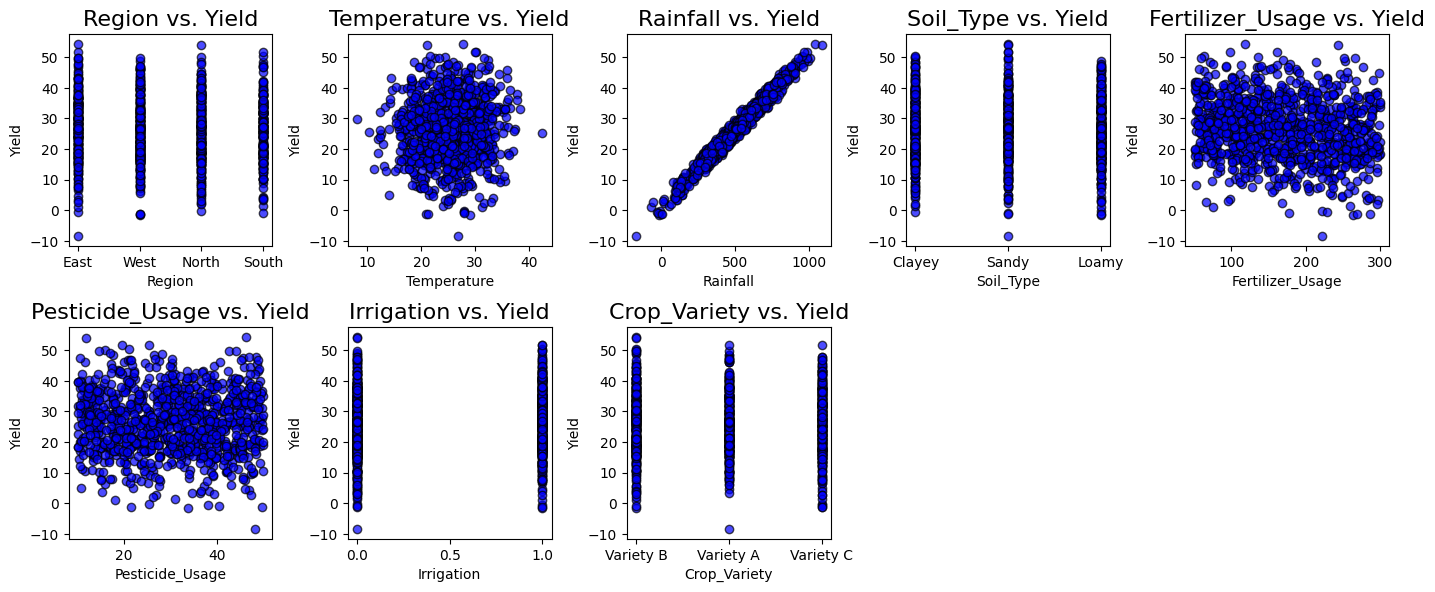

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of rows and columns for subplots
num_columns = len(df.columns) - 1  # Exclude 'Yield'
num_rows = int(np.ceil(num_columns / 5))  # Calculate rows to fit all columns

# Create subplots with adjusted spacing and size
fig, axs = plt.subplots(num_rows, 5, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
axs = axs.ravel()

# Iterate through columns to create scatter plots
for index, column in enumerate(df.columns):
    if column != 'Yield':  # Skip plotting 'Yield' against itself
        ax = axs[index]
        ax.set_title(f"{column} vs. Yield", fontsize=16)

        # Scatter plot with enhancements
        ax.scatter(x=df[column], y=df['Yield'], color='blue', edgecolor='k', alpha=0.7)
        ax.set_xlabel(column)
        ax.set_ylabel('Yield')

# Delete any unused subplots
for i in range(num_columns, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout(pad=1)

# Show the plot
plt.show()

**Checking for multicollinearity**

Use of correlation heatmap

In [71]:
# Exclude non-numeric columns before computing the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])

In [72]:
# Create the correlation_matrix
correlation_matrix = numeric_columns.corr()

print("\nCorrelation matrix of the variables:")
correlation_matrix


Correlation matrix of the variables:


,Temperature,Rainfall,Fertilizer_Usage,Pesticide_Usage,Irrigation,Yield
Temperature,1.000000,0.003071,-0.029462,0.038465,-0.025574,0.057396
Rainfall,0.003071,1.000000,-0.022499,-0.043367,0.025840,0.986698
Fertilizer_Usage,-0.029462,-0.022499,1.000000,-0.047222,-0.050501,-0.166688
Pesticide_Usage,0.038465,-0.043367,-0.047222,1.000000,0.030822,-0.033239
Irrigation,-0.025574,0.025840,-0.050501,0.030822,1.000000,0.056532
Yield,0.057396,0.986698,-0.166688,-0.033239,0.056532,1.000000


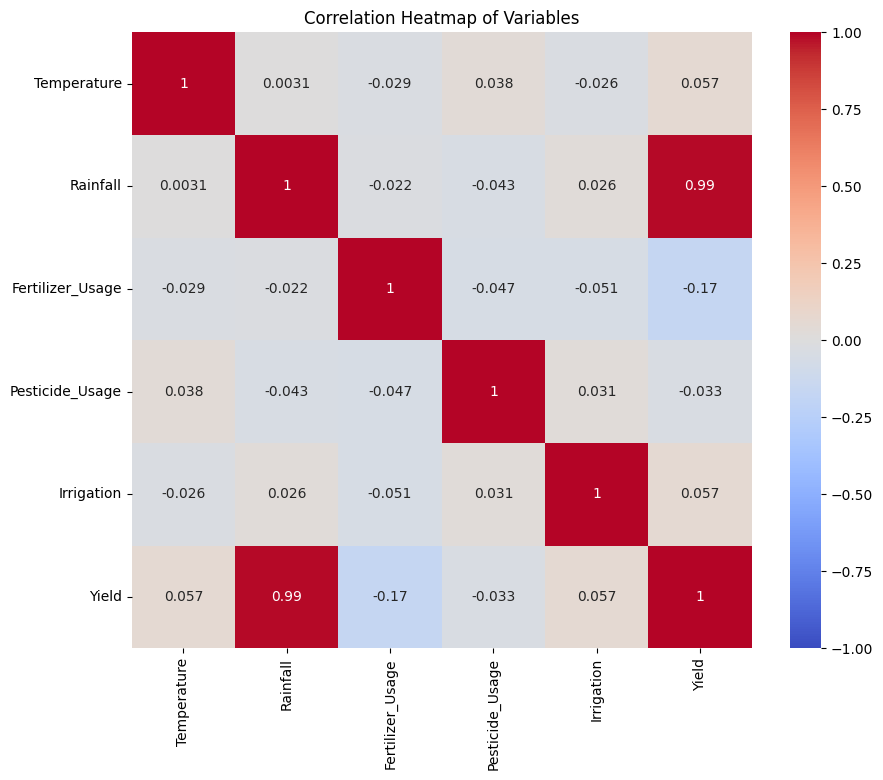

In [73]:
# Exclude non-numeric columns and the dependent variable from the correlation matrix
numeric_dependent_variables = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_dependent_variables.corr()

# Generate the correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')
plt.show()

From correlation heatmap, we can see several strong correlations among predictors.

In [74]:
# Dummy Variable Encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [75]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target variable
X = df_encoded.drop('Yield', axis=1)  # Features
y = df_encoded['Yield']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the training set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Reduced hyperparameter grid for faster tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initializing the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initializing RandomizedSearchCV with a reduced number of iterations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)

# Fitting RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best parameters found by RandomizedSearchCV:", best_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found by RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Initializing the RandomForestRegressor with best parameters from RandomizedSearchCV
best_rf = RandomForestRegressor(**best_params, random_state=42)

# Training the model on the training set
best_rf.fit(X_train, y_train)

# Making predictions on the validation set
y_pred_val = best_rf.predict(X_val)

# Evaluating the model on the validation set
mse_val = metrics.mean_squared_error(y_val, y_pred_val)
r2_val = metrics.r2_score(y_val, y_pred_val)

print("Validation Set Performance:")
print(f"MSE: {mse_val}")
print(f"R2: {r2_val}")

Validation Set Performance:
MSE: 6.508612623646075
R2: 0.9344623732464526


In [78]:
import numpy as np

# Extract feature importances from the model
feature_importances = best_rf.feature_importances_

# Get the names of the features, excluding the target variable 'Yield'
feature_names = X.columns

# Create a Pandas series
importances = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)
print("Feature importances sorted:")
print(sorted_importances)

# Cumulative sum of importances
cumulative_importances = np.cumsum(sorted_importances)

# Select features that contribute to 95% of the importance
threshold = 0.95
min_features = 7  # Minimum number of features to include
selected_features = sorted_importances.index[cumulative_importances <= threshold]

# If fewer than min_features are selected, ensure at least min_features are included
if len(selected_features) < min_features:
    selected_features = sorted_importances.index[:min_features]

print("Selected features based on cumulative importance threshold:")
print(selected_features)

Feature importances sorted:
Rainfall                  0.776266
Fertilizer_Usage          0.070711
Temperature               0.053980
Pesticide_Usage           0.048751
Irrigation                0.007264
Region_West               0.007024
Crop_Variety_Variety C    0.006486
Soil_Type_Loamy           0.006325
Soil_Type_Sandy           0.006268
Crop_Variety_Variety B    0.005937
Region_North              0.005635
Region_South              0.005353
dtype: float64
Selected features based on cumulative importance threshold:
Index(['Rainfall', 'Fertilizer_Usage', 'Temperature', 'Pesticide_Usage',
       'Irrigation', 'Region_West', 'Crop_Variety_Variety C'],
      dtype='object')


In [79]:
# Reduce the dataset to the selected features
X_selected = X[selected_features]

# Splitting the dataset with selected features into training, validation, and testing sets
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(X_train[selected_features], y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2
X_test_selected = X_test[selected_features]

# Training the model with selected features
best_rf_selected = RandomForestRegressor(**best_params, random_state=42)
best_rf_selected.fit(X_train_selected, y_train_selected)

# Making predictions with selected features on validation set
y_pred_val_selected = best_rf_selected.predict(X_val_selected)

# Evaluating the model with selected features on validation set
mse_val_selected = metrics.mean_squared_error(y_val_selected, y_pred_val_selected)
r2_val_selected = metrics.r2_score(y_val_selected, y_pred_val_selected)

print("Validation Set Performance with Selected Features:")
print(f"MSE: {mse_val_selected}")
print(f"R2: {r2_val_selected}")

Validation Set Performance with Selected Features:
MSE: 6.62462433623524
R2: 0.9365347202189342


In [80]:
# Making predictions with selected features on test set
y_pred_test_selected = best_rf_selected.predict(X_test_selected)

# Evaluating the model with selected features on test set
mse_test_selected = metrics.mean_squared_error(y_test, y_pred_test_selected)
r2_test_selected = metrics.r2_score(y_test, y_pred_test_selected)

print("Test Set Performance with Selected Features:")
print(f"MSE: {mse_test_selected}")
print(f"R2: {r2_test_selected}")

Test Set Performance with Selected Features:
MSE: 3.841824343395483
R2: 0.9585188947144743


Feature Importances:
                  Feature  Importance
0                Rainfall    0.809732
1        Fertilizer_Usage    0.064844
2             Temperature    0.056940
3         Pesticide_Usage    0.052479
6  Crop_Variety_Variety C    0.005683
4              Irrigation    0.005392
5             Region_West    0.004930


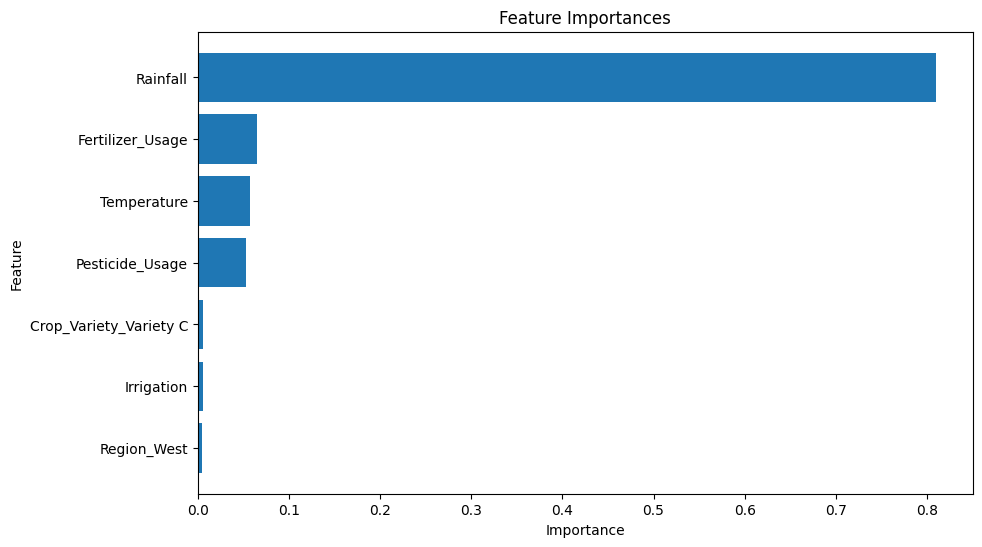

In [81]:
import matplotlib.pyplot as plt

# Feature importances from the best model
feature_importances = best_rf_selected.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [82]:
import joblib

# Save the best model for future use
joblib.dump(best_rf_selected, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Predictions
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    # Validation set metrics
    mse_val = metrics.mean_squared_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mse_val)
    mae_val = metrics.mean_absolute_error(y_val, y_pred_val)
    r2_val = metrics.r2_score(y_val, y_pred_val)

    # Test set metrics
    mse_test = metrics.mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)

    # Cross-validation scores (using training data)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Print performance metrics
    print("Validation Set Performance:")
    print(f"MSE: {mse_val}")
    print(f"RMSE: {rmse_val}")
    print(f"MAE: {mae_val}")
    print(f"R2: {r2_val}")

    print("\nTest Set Performance:")
    print(f"MSE: {mse_test}")
    print(f"RMSE: {rmse_test}")
    print(f"MAE: {mae_test}")
    print(f"R2: {r2_test}")

    print("\nCross-Validation R2 Scores:")
    print(cv_scores)
    print("Mean CV R2 Score:", cv_scores.mean())
    print("Standard Deviation of CV R2 Score:", cv_scores.std())

# Evaluate the final model with selected features
evaluate_model(best_rf_selected, X_train_selected, y_train_selected, X_val_selected, y_val_selected, X_test_selected, y_test)

Validation Set Performance:
MSE: 6.62462433623524
RMSE: 2.5738345588314804
MAE: 1.6863054395266854
R2: 0.9365347202189342

Test Set Performance:
MSE: 3.841824343395483
RMSE: 1.9600572296225136
MAE: 1.364039985346701
R2: 0.9585188947144743

Cross-Validation R2 Scores:
[0.94245578 0.91132434 0.95321879 0.935254   0.91376049]
Mean CV R2 Score: 0.9312026816533466
Standard Deviation of CV R2 Score: 0.01629191977769386


**Checking for independence**

**Residuals vs. predictor variable plots**

We will plot the residuals (the vertical distances between each data point and the regression hyperplane)in order to confirm the independence assumption, which states that the residuals should be independent.

If residuals are independent, then;

*Residuals are approximately uniformly and randomly distributed about the zero x-axes.

*Residuals are not forming any specific clusters.

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


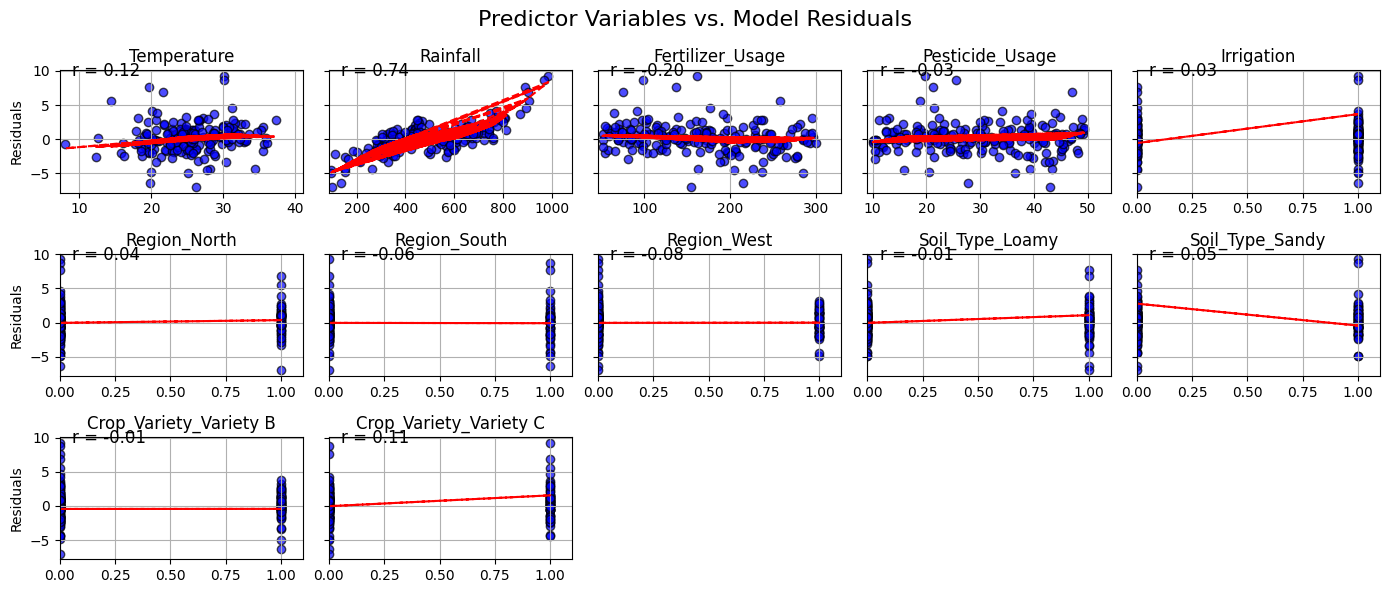

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assume y_test, y_pred_test, X_test, and best_rf are already defined
y_pred_test = best_rf.predict(X_test)

# Calculate the number of rows and columns for subplots
num_columns = len(X_test.columns)
num_rows = int(np.ceil(num_columns / 5))

# Create subplots and calculate residuals
fig, axs = plt.subplots(num_rows, 5, figsize=(14, 6), sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.2)
fig.suptitle('Predictor Variables vs. Model Residuals', fontsize=16)
axs = axs.ravel()

# Iterate over predictor columns
for index, column in enumerate(X_test.columns):
    ax = axs[index]
    ax.set_title(column, fontsize=12)

    # Scatter plot using X_test and residuals calculated from y_test and y_pred_test
    residuals = y_test - y_pred_test
    ax.scatter(x=X_test[column], y=residuals, color='blue', edgecolor='k', alpha=0.7)

    # Add a lowess smoothing line (updated)
    lowess_result = lowess(residuals, X_test[column], frac=0.3, return_sorted=False)
    ax.plot(X_test[column], lowess_result, color='red', linestyle='--')  # Use X_test[column] for x-values

    # Calculate and display Pearson correlation coefficient
    correlation = np.corrcoef(X_test[column], residuals)[0, 1]
    ax.text(0.05, 0.95, f'r = {correlation:.2f}', transform=ax.transAxes, fontsize=12)

    ax.grid(True)

    # Set axis limits for better visualization
    x_min = X_test[column].min()
    x_max = X_test[column].max()
    ax.set_xlim([x_min * 0.9, x_max * 1.1])

    # Add y-axis label only for the first subplot in each row
    if index % 5 == 0:
        ax.set_ylabel('Residuals')

# Delete any unused subplots if there are fewer than 10 predictors
for i in range(num_columns, len(axs)):
    fig.delaxes(axs[i])

# Show the plot
plt.tight_layout()
plt.show()

Observing the plots above, two things are relatively clear:

All of the residuals are slightly skewed to the positive (reaching +10 to the positive but only up to about -5 to the negative).

There is no obvious clustering.

Our conclusion here is that the residuals are largely independent

**Checking for homoscedasticity**

We will assess the presence of homoscedasticity or heteroscedasticity by plotting the residuals against the fitted values (for example, Yield). In the case of homoscedasticity, the scatterplot should exhibit a random and uniform spread of points, indicating that the variance of the residuals remains constant across all levels of the predictor variable(s). Conversely, heteroscedasticity is evident when the spread of the residuals systematically changes as the fitted values increase or decrease, potentially resembling a cone shape.

Homoscedasticity implies a constant variance of the residuals across different levels of the predictor variable(s), while heteroscedasticity indicates varying variances. It's essential to detect and address heteroscedasticity as it can affect the validity of statistical inference and prediction.

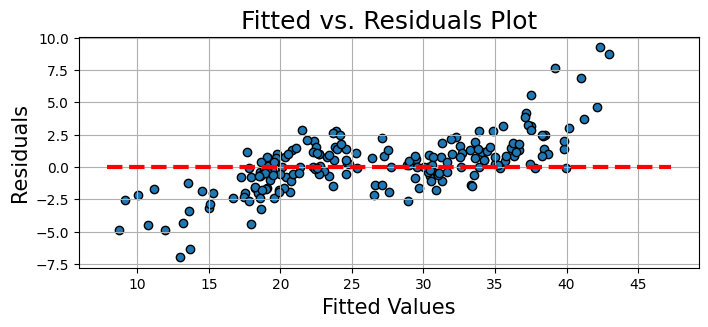

In [85]:
import matplotlib.pyplot as plt

# ... (Your code for model training, prediction, and residual calculation)

# Get fitted values (predicted values) and residuals
fitted_values = best_rf.predict(X_test)
residuals = y_test - fitted_values

# Create the residual plot
plt.figure(figsize=(8, 3))
plt.scatter(x=fitted_values, y=residuals, edgecolor='k')
plt.hlines(y=0, xmin=fitted_values.min() * 0.9, xmax=fitted_values.max() * 1.1, color='red', linestyle='--', linewidth=3)
plt.xlabel("Fitted Values", fontsize=15)
plt.ylabel("Residuals", fontsize=15)
plt.title("Fitted vs. Residuals Plot", fontsize=18)
plt.grid(True)
plt.show()

The points towards the right-hand side of the plot tend to be scattered slightly less densely suggesting the possibility of heteroscedasticity, where the variance of the residuals may vary systematically with the magnitude of the predicted values. However, i will confirm the presence of heteroscedasticity using **Breusch-Pagan test**.This test examines whether the variance of the residuals is dependent on the independent variables in the regression model. It is based on regressing the squared residuals on the independent.


**Breusch-Pagan test**

In [86]:
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Sample data (replace with your own data)
np.random.seed(42)
X = sm.add_constant(np.random.randn(100, 3))  # Independent variables with constant
y = np.dot(X, [1, 2, 3, 4]) + np.random.randn(100)  # Dependent variable (with some noise)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()  # Fit the model and store results

# Breusch-Pagan Test (using 'results')
residuals = results.resid
bp_test_result = sms.het_breuschpagan(residuals, results.model.exog)
print("Breusch-Pagan Test Results:")
print("LM Statistic:", bp_test_result[0])
print("LM-Test p-value:", bp_test_result[1])
print("F-Statistic:", bp_test_result[2])
print("F-Test p-value:", bp_test_result[3])

Breusch-Pagan Test Results:
LM Statistic: 3.4028229720905134
LM-Test p-value: 0.333586074584294
F-Statistic: 1.1272620842266967
F-Test p-value: 0.3420084339376646


Interpretation of Breusch-Pagan test results.

p-values-measures the strength of evidence against null hypothesis.

If p-value <= 0.05 (typical threshold).Reject null hypothesis;Statistically significant.

If p-value > 0.05.Fail to reject null hypothesis;statistically insignificant.

LM-Test p-value: This is the p-value associated with the Lagrange Multiplier (LM) test statistic. It tests the null hypothesis that there is no heteroscedasticity (i.e. the variance of the residuals is constant across all levels of the predictors). In our case, the LM-Test p-value is 0.333, which is greater than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no strong evidence of heteroscedasticity in the residuals.

F-Test p-value: This is the p-value associated with the F-statistic. It tests the same null hypothesis as the LM test but is based on a different statistic. In our case, the F-Test p-value is 0.342, which is also greater than 0.05. Similarly, we fail to reject the null hypothesis based on the F-Test, further supporting the conclusion that there is no strong evidence of heteroscedasticity.

Overall, based on these results, we can conclude that there is no significant evidence of heteroscedasticity in the residuals of the regression model which implies that the assumption of homoscedasticity is likely satisfied. In other words, the variance of the residuals remains relatively constant across different levels of the predictor variables.

This is ensues that the estimated coefficients are unbiased and the standard errors are reliable, leading to valid statistical inference.

**Checking for normality**

We will check for violations of the normality assumption in two different ways:

  1.Plotting a histogram of the normalised residuals.

  2.Generating a Q-Q plot of the residuals

**Histogram of normalised residuals**

We create a histogram of the residuals to examine their distribution. It is fairly easy to recognise when a distribution resembles the classic bell curve shape of the normal distribution

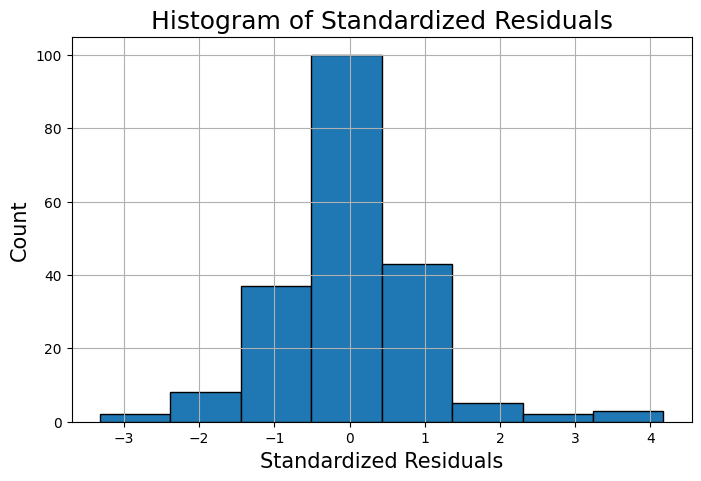

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats  # For the zscore function

# ... your existing code for model training and prediction ...

# Get residuals
residuals = y_test - y_pred_test

# Standardize the residuals (similar to Pearson residuals)
std_residuals = stats.zscore(residuals)

# Plot histogram of standardized residuals
plt.figure(figsize=(8, 5))
plt.hist(std_residuals, bins=8, edgecolor='k')
plt.ylabel('Count', fontsize=15)
plt.xlabel('Standardized Residuals', fontsize=15)  # Changed label
plt.title("Histogram of Standardized Residuals", fontsize=18)
plt.grid(True)
plt.show()

From the histogram,most residuals are centered around the mean,indicating normality.

**Q-Q plot of the residuals**

A Q-Q plot, short for quantile-quantile plot, compares the quantiles of the residuals against the quantiles of the theoretical standard normal distribution. In the plot, the one-to-one line (shown in red) represents perfect agreement with the theoretical distribution, indicating normality. The proximity of the plotted points to this red line indicates how closely the distribution of residuals matches the standard normal distribution. Closer alignment suggests a stronger resemblance to normality.

<Figure size 800x500 with 0 Axes>

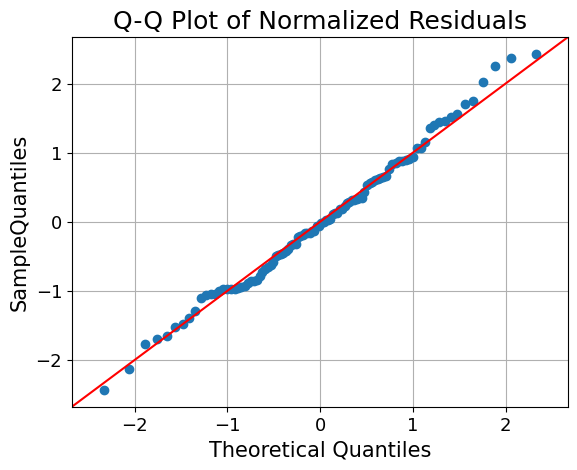

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Sample data (replace with your own data)
np.random.seed(42)
X = sm.add_constant(np.random.randn(100, 3))  # Independent variables with constant
y = np.dot(X, [1, 2, 3, 4]) + np.random.randn(100)  # Dependent variable (with some noise)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Create the Q-Q plot of Pearson residuals
plt.figure(figsize=(8, 5))
qqplot(results.resid_pearson, line='45', fit=True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("SampleQuantiles", fontsize=15)
plt.title("Q-Q Plot of Normalized Residuals", fontsize=18)
plt.grid(True)
plt.show()

**Checking for outliers in residuals**
**Plotting Cook's distance**

**Cook's distance** is a measure used in regression analysis to assess the influence of individual data points on the regression model. It quantifies how much the model's predictions change when a particular observation is removed from the dataset.

Observations with large Cook's distances have a disproportionate impact on the model, meaning that they significantly influence the estimated coefficients and overall fit of the regression model. These observations can potentially be influential outliers or leverage points that have a substantial effect on the regression results.

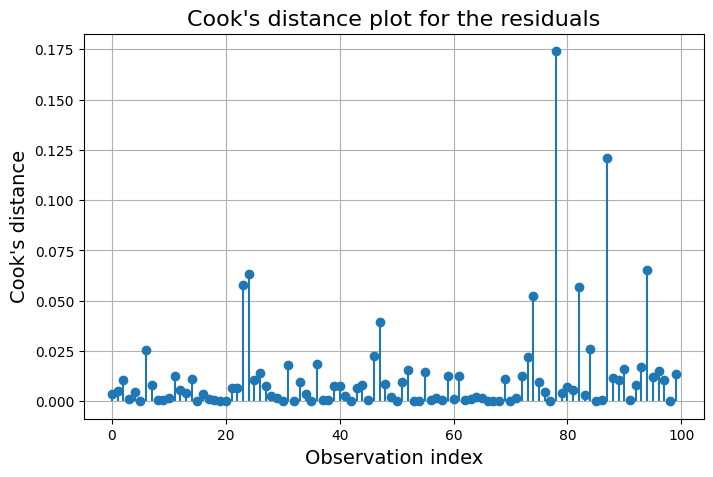

In [89]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence
inf = OLSInfluence(results)
# Extract Cook's distance and p-values
(c, p) = inf.cooks_distance
# Plotting
plt.figure(figsize=(8, 5))
plt.title("Cook's distance plot for the residuals", fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt='o', linefmt='-', basefmt=' ') # Use stem plot for better visualization
plt.xlabel('Observation index', fontsize=14)
plt.ylabel("Cook's distance", fontsize=14)
plt.grid(True)
plt.show()

There are two values with much higher Cook's distances than the rest.This indicates our dataset doesn't suffer from outliers.